In [1]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
!pip install seaborn

In [3]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv(r'C:\Users\user\Documents\8SEMESTRE\ANALISIS DE DATOS\Tarea 3\heart_cleveland_upload.csv')

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

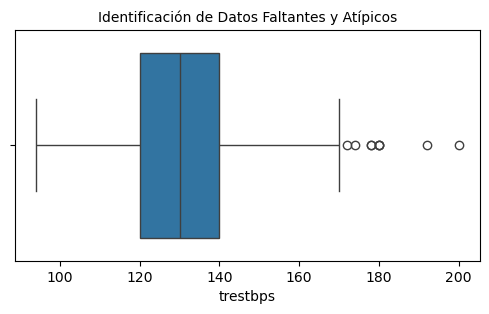

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

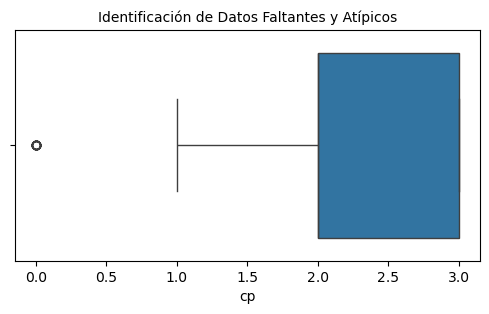

In [8]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [9]:
# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [10]:
#Revisión de datos faltantes
print("Cantidad de registros con cero en Presión Arterial (trestbps): ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con cero en Colesterol (chol): ", Datos['chol'].isin([0]).sum())
print("Cantidad de registros con cero en Frecuencia cardíaca máxima (thalach): ", Datos['thalach'].isin([0]).sum())

Cantidad de registros con cero en Presión Arterial (trestbps):  0
Cantidad de registros con cero en Colesterol (chol):  0
Cantidad de registros con cero en Frecuencia cardíaca máxima (thalach):  0


In [11]:
# Mostrar cantidad de valores faltantes por cada columna
faltantes = Datos.isnull().sum()

# Filtrar solo columnas con al menos un valor faltante
faltantes = faltantes[faltantes > 0]

# Mostrar el resultado ordenado
print("Columnas con datos faltantes y su cantidad:\n")
print(faltantes.sort_values(ascending=False))

Columnas con datos faltantes y su cantidad:

Series([], dtype: int64)


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

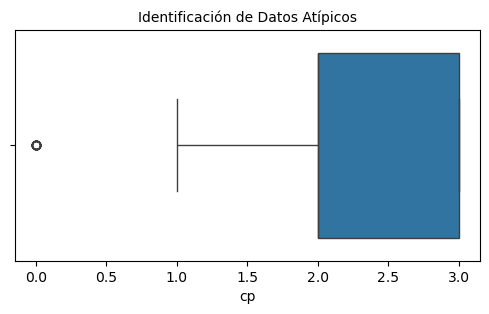

In [12]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [13]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=3
Total_Atipicos=((Datos['cp']<nivel_minimo)|(Datos['cp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

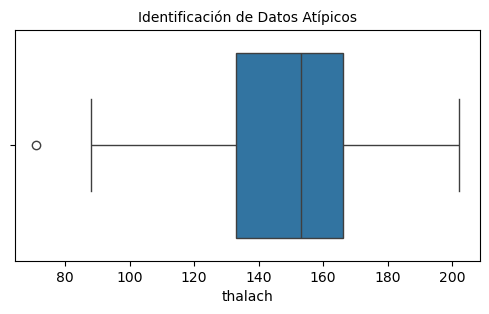

In [14]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [15]:
#Conteo de Datos Atípicos

nivel_minimo=60
nivel_maximo=220
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [16]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [17]:
# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [18]:
# Total de personas con Emfermedad cardiaca

Datos['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [19]:
# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [20]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [21]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [22]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

In [23]:
# 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [24]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [25]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [26]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [27]:
# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [28]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [29]:
# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

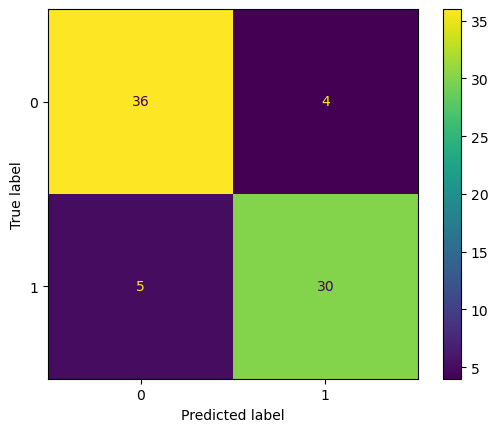

In [30]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

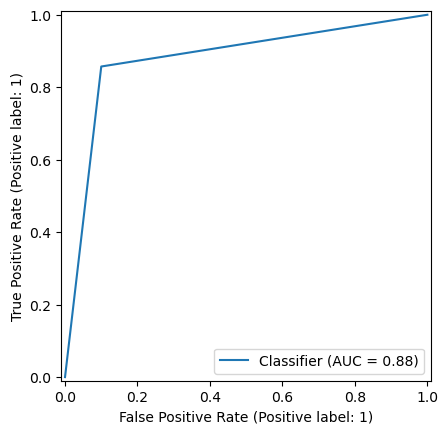

In [31]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()